#### EXERCÍCIO AVALIATIVO 07: Caminhadas aleatórias

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
cm = plt.get_cmap('Set2')

In [3]:
def random_walk(N, d):
    steps = np.random.uniform(-0.5, 0.5, size=(N, d))
    walk = np.cumsum(steps, axis=0)
    return walk

In [4]:
def get_rms_step_size(walk):
    step_sizes = np.diff(walk)
    return np.sqrt(np.mean(step_sizes**2))

**2.5.A.1. 1D random walk**

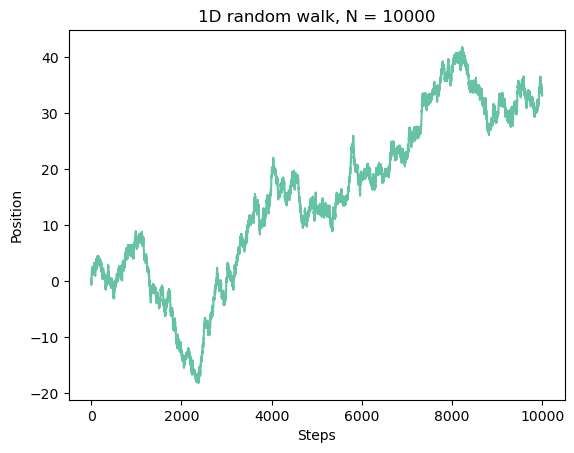

In [5]:
N = 10000
d = 1

walk_1d = random_walk(N, d)
t = np.arange(len(walk_1d))

plt.plot(t, walk_1d, color=cm(0))
plt.title(f'1D random walk, N = {N}')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.show()

**2.5.A.2. 2D random walks**

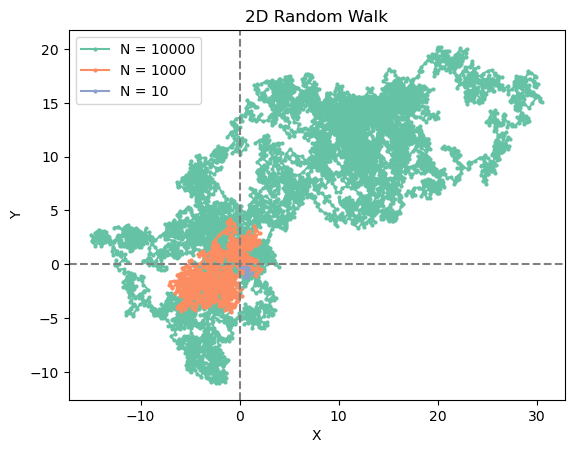

In [6]:
N_values = [10000, 1000, 10]
d = 2

for i, N in enumerate(N_values):
    walk_2d = random_walk(N, d)
    t = np.arange(len(walk_2d))
    
    plt.plot(walk_2d[:, 0], walk_2d[:, 1], marker='o', linestyle='-', markersize=2, color=cm(i), label=f'N = {N}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Random Walk')
    plt.legend(loc='best')

plt.axhline(y=0, linestyle="dashed", color='gray')
plt.axvline(x=0, linestyle="dashed", color='gray')

plt.show()

**2.5.A.3. Distances changes based on number of steps**

**2.5.B.**

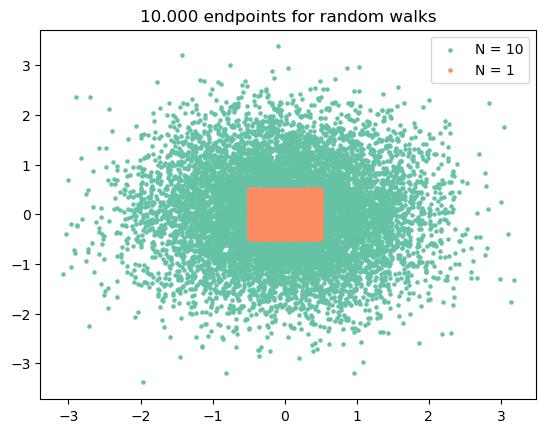

In [7]:
W = 10000
walks_1 = [random_walk(1, d) for _ in range(W)]
endpoints_1 = np.array([walk[-1] for walk in walks_1])

walks_10 = [random_walk(10, d) for _ in range(W)]
endpoints_10 = np.array([walk[-1] for walk in walks_10])

plt.scatter(endpoints_10[:, 0], endpoints_10[:, 1], s=5, color=cm(0), label=f'N = 10')
plt.scatter(endpoints_1[:, 0], endpoints_1[:, 1], s=5, color=cm(1), label=f'N = 1')

plt.title("10.000 endpoints for random walks")
plt.legend()

plt.show()

**2.5.C**

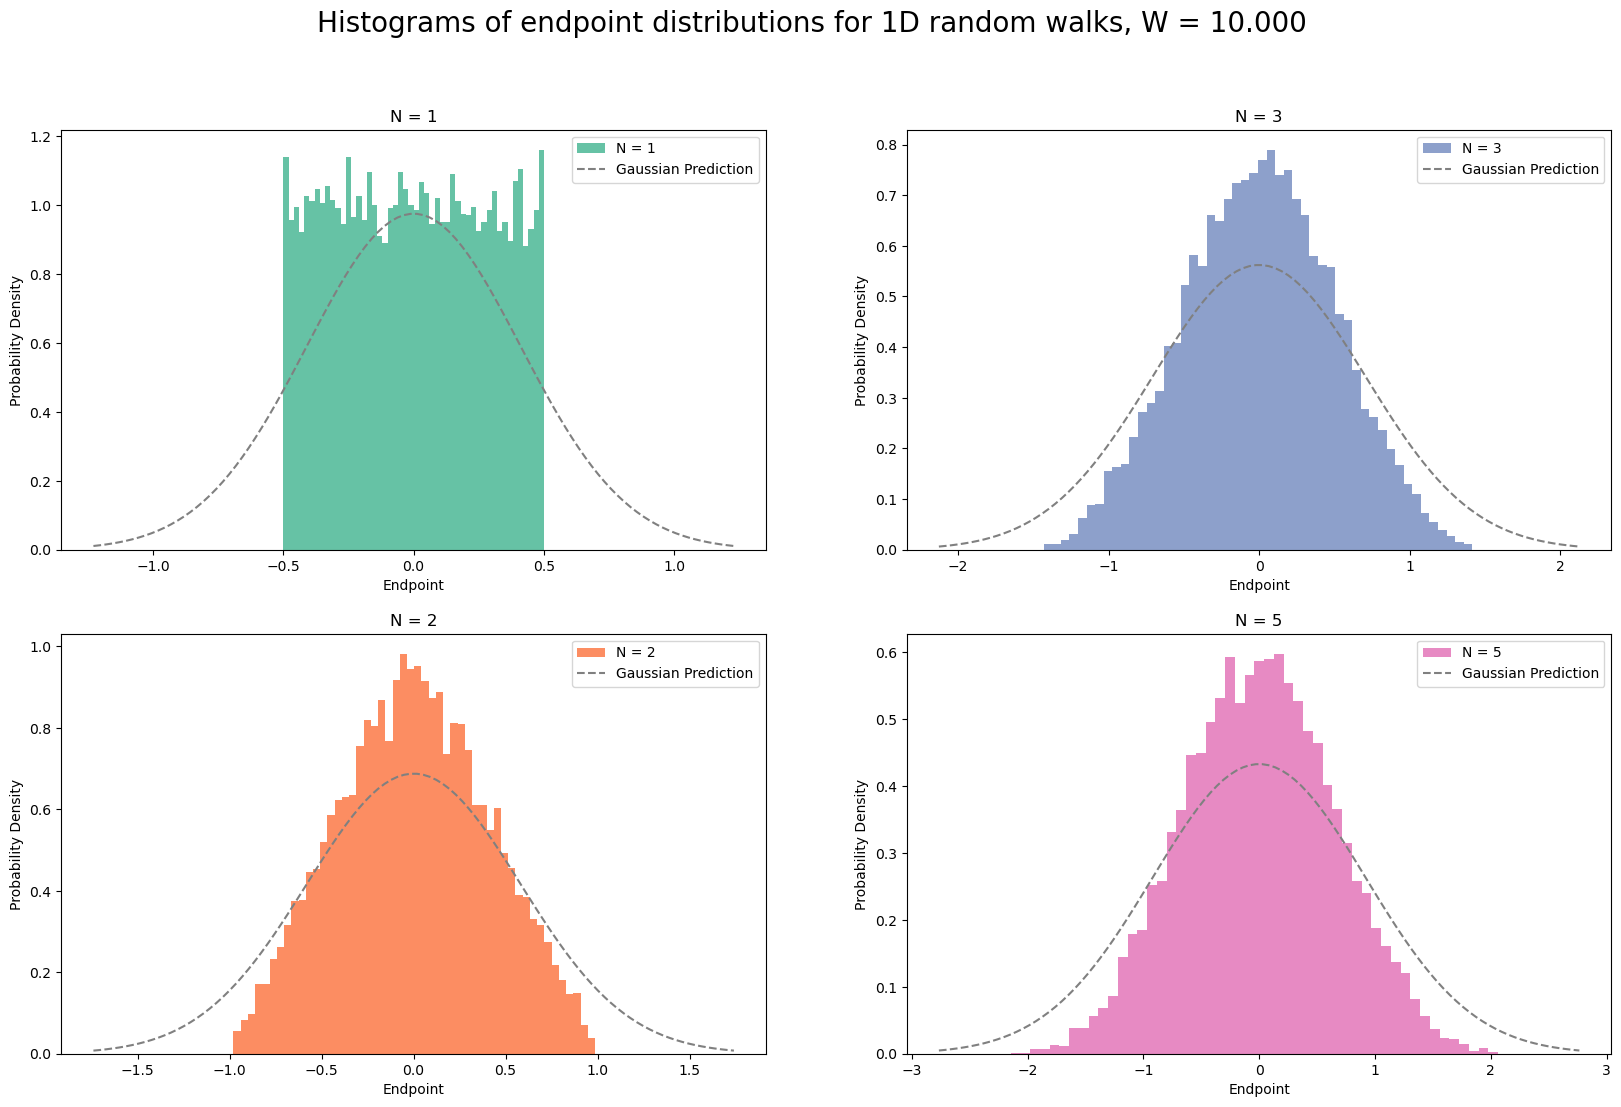

In [21]:
# Parameters
W = 10000
d = 1
N_vec = [1, 2, 3, 5]  # Different values of N

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle("Histograms of endpoint distributions for 1D random walks, W = 10.000", fontsize=20)

col = 0
# Generate and plot histograms for different values of N
for i, N in enumerate(N_vec):
    walks = [random_walk(N, d) for _ in range(W)]
    endpoints = np.array([walk[-1] for walk in walks])
    
    row = i%2
    if i > (len(N_vec)/2)-1:
        col = 1
        
    axes[row][col].hist(endpoints, bins=50, density=True, color=cm(i), label=f'N = {N}')
    
    rms_step_size = get_rms_step_size(endpoints.flatten())
    
    # Plot the predicted Gaussian distribution
    x = np.linspace(-3 * rms_step_size, 3 * rms_step_size, 100)
    y = 1 / (np.sqrt(2 * np.pi) * rms_step_size) * np.exp(-0.5 * (x / rms_step_size)**2)
    axes[row][col].plot(x, y, '--', color='gray', label='Gaussian Prediction')

    axes[row][col].set_title(f'N = {N}')
    axes[row][col].set_xlabel('Endpoint')
    axes[row][col].set_ylabel('Probability Density')
    axes[row][col].legend()

plt.show()